# **Analyze customer behavior based on transaction data**

The aim of this colab file is to develop a data analysis project that focuses on understanding and analyzing customer behavior based on transactional data. The goal is to perform Exploratory Data Analysis (EDA) to derive valuable insights into customer preferences, purchasing patterns, and overall behavior.

This is for CVIP program's PHASE 1, TASK 1 (Normal TASK).

It all started with a simple data download from KAGGLE:

https://www.kaggle.com/datasets/iamprateek/store-transaction-data?resource=download


Then uploading this data into my Google Drive, then mounting my drive to the Colab instance. This prevents the need to regularly upload the file every time the instance restarts.

As always, we start with data cleaning;








                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000
##################################################################  is there a significant correlation?  #################################
           QTY    VALUE
QTY    1.00000  0.37409
VALUE  0.37409  1.00000
All Columns in the DATA ['MONTH' 'STORECODE' 'QTY' 'VALUE' 'GRP' 'SGRP' 'SSGRP' 'CMP' 'MBRD' 'BRD']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 

<ipython-input-83-0bd96cbccfff>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f.corr())


<Axes: xlabel='STORECODE', ylabel='QTY'>

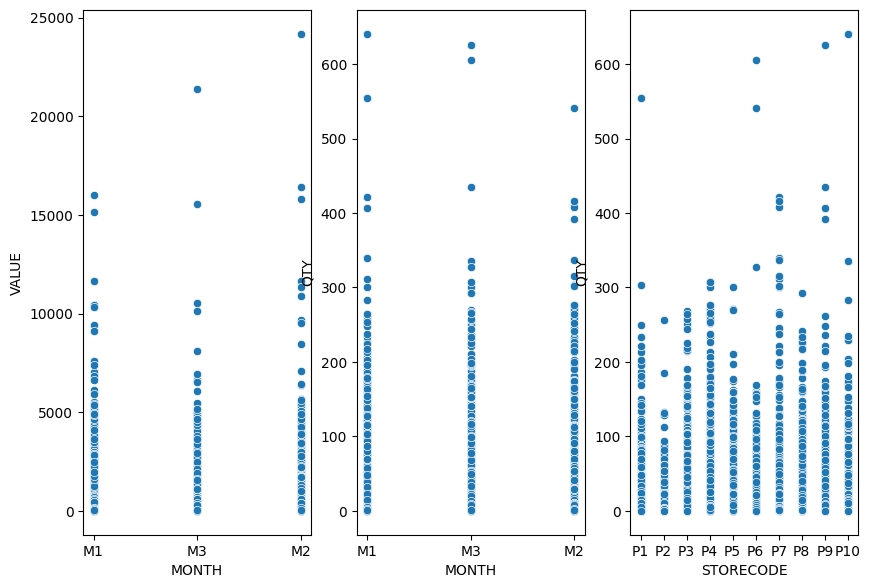

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se

FILE='https://drive.google.com/file/d/16ty97YGdEw0SH6ung_J-hRU7cJ6h_RIS/view?usp=drive_link'
FILE='https://drive.google.com/uc?id=' + FILE.split('/')[-2]
f = pd.read_csv(FILE)

print(f.describe())
print('##################################################################  is there a significant correlation?  #################################')
print(f.corr())
print('All Columns in the DATA', f.columns.values)
print('is there null values in the DataFrame?', f.info())
print('#################################################################  visualizing the data  #################################################')


print('A scatter plot of Values vs Month')
plt.figure(figsize=(10,15))
plt.subplot(2,3,1)
se.scatterplot(f,x = 'MONTH', y= 'VALUE')
plt.subplot(2,3,2)
se.scatterplot(f,x = 'MONTH', y = 'QTY')
plt.subplot(2,3,3)
se.scatterplot(f,x = 'STORECODE', y = 'QTY')




After making sure that the DataFrame doesn't contain any NULL Values, I like to visualize my data into a scatter plot to a get a taste of the date before processing it. The density near 0 is alarming, specially when we check the MIN and find 0, therefore we will omit Values and QTY with 0 and check again

                QTY         VALUE
count  10922.000000  10922.000000
mean      21.283556    384.411829
std       37.903976    848.424588
min        1.000000      1.000000
25%        3.000000     68.000000
50%        8.000000    165.000000
75%       23.000000    378.000000
max      641.000000  24185.000000


<Axes: xlabel='STORECODE', ylabel='QTY'>

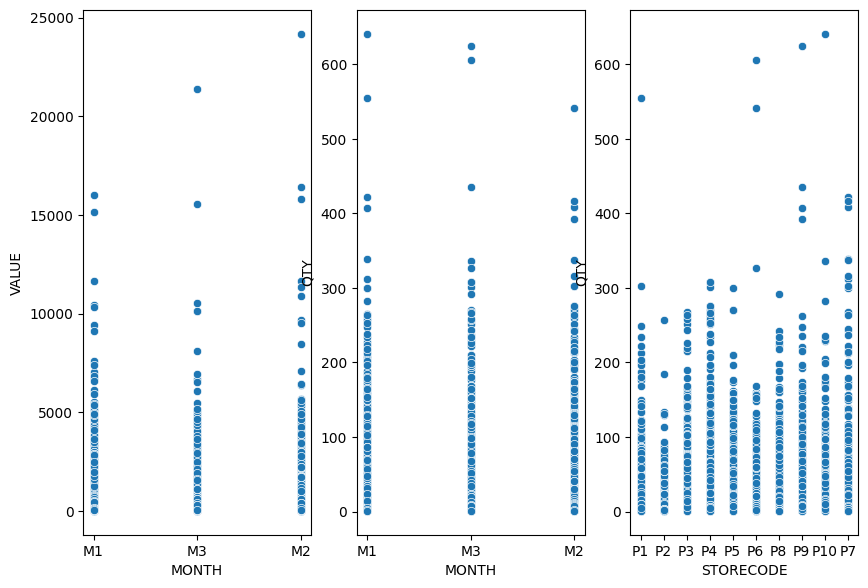

In [ ]:
F = f.drop(f[f['QTY'] == 0].index)
F = F.drop(F[F['VALUE'] == 0].index)
print(F.describe())
plt.figure(figsize=(10,15))
plt.subplot(2,3,1)
se.scatterplot(F,x = 'MONTH', y= 'VALUE')
plt.subplot(2,3,2)
se.scatterplot(F,x = 'MONTH', y = 'QTY')
plt.subplot(2,3,3)
se.scatterplot(F,x = 'STORECODE', y = 'QTY')



<Axes: >

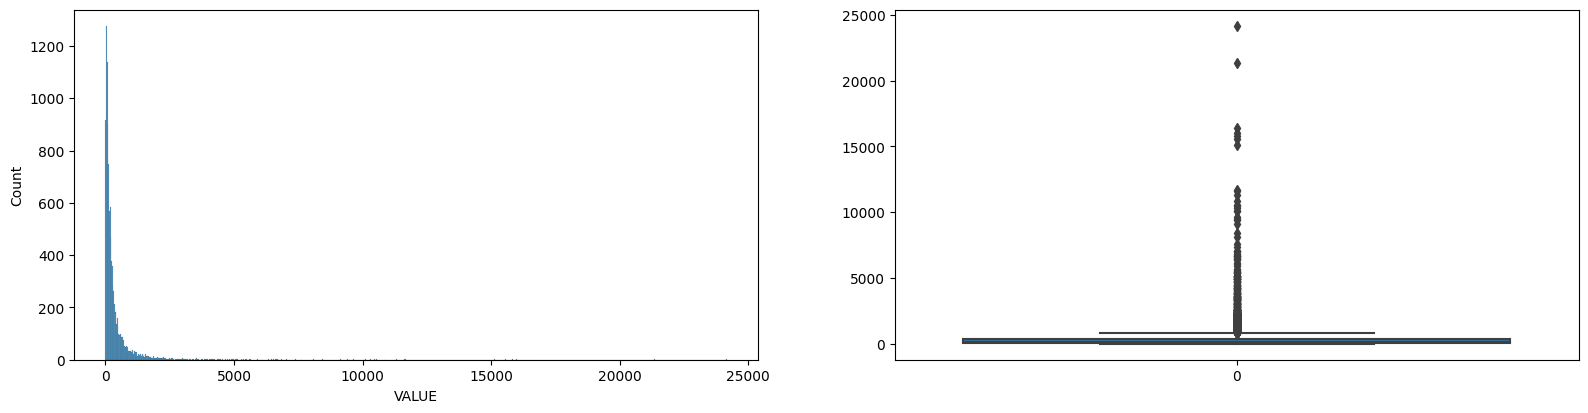

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
se.histplot(F['VALUE'])
plt.subplot(2,3,2)
se.boxplot(F['VALUE'])

We will start cleaning our data, by following IQR outlier detection method, we notice that it removes more than 50% of our data.

To remove outliers we followed the percentile method.

(10922, 10)
68.0 378.0
Upper Limit is: 945.0 Lower Limit is 170.0
(4372, 10)
Upper Limit is: 3617.3199999999924 Lower Limit is 9.0
(10695, 10)
                QTY         VALUE
count  10922.000000  10922.000000
mean      21.283556    384.411829
std       37.903976    848.424588
min        1.000000      1.000000
25%        3.000000     68.000000
50%        8.000000    165.000000
75%       23.000000    378.000000
max      641.000000  24185.000000
                QTY         VALUE
count  10695.000000  10695.000000
mean      20.945208    325.654231
std       36.698135    456.313105
min        1.000000     10.000000
25%        3.000000     70.000000
50%        8.000000    165.000000
75%       22.000000    372.000000
max      641.000000   3611.000000


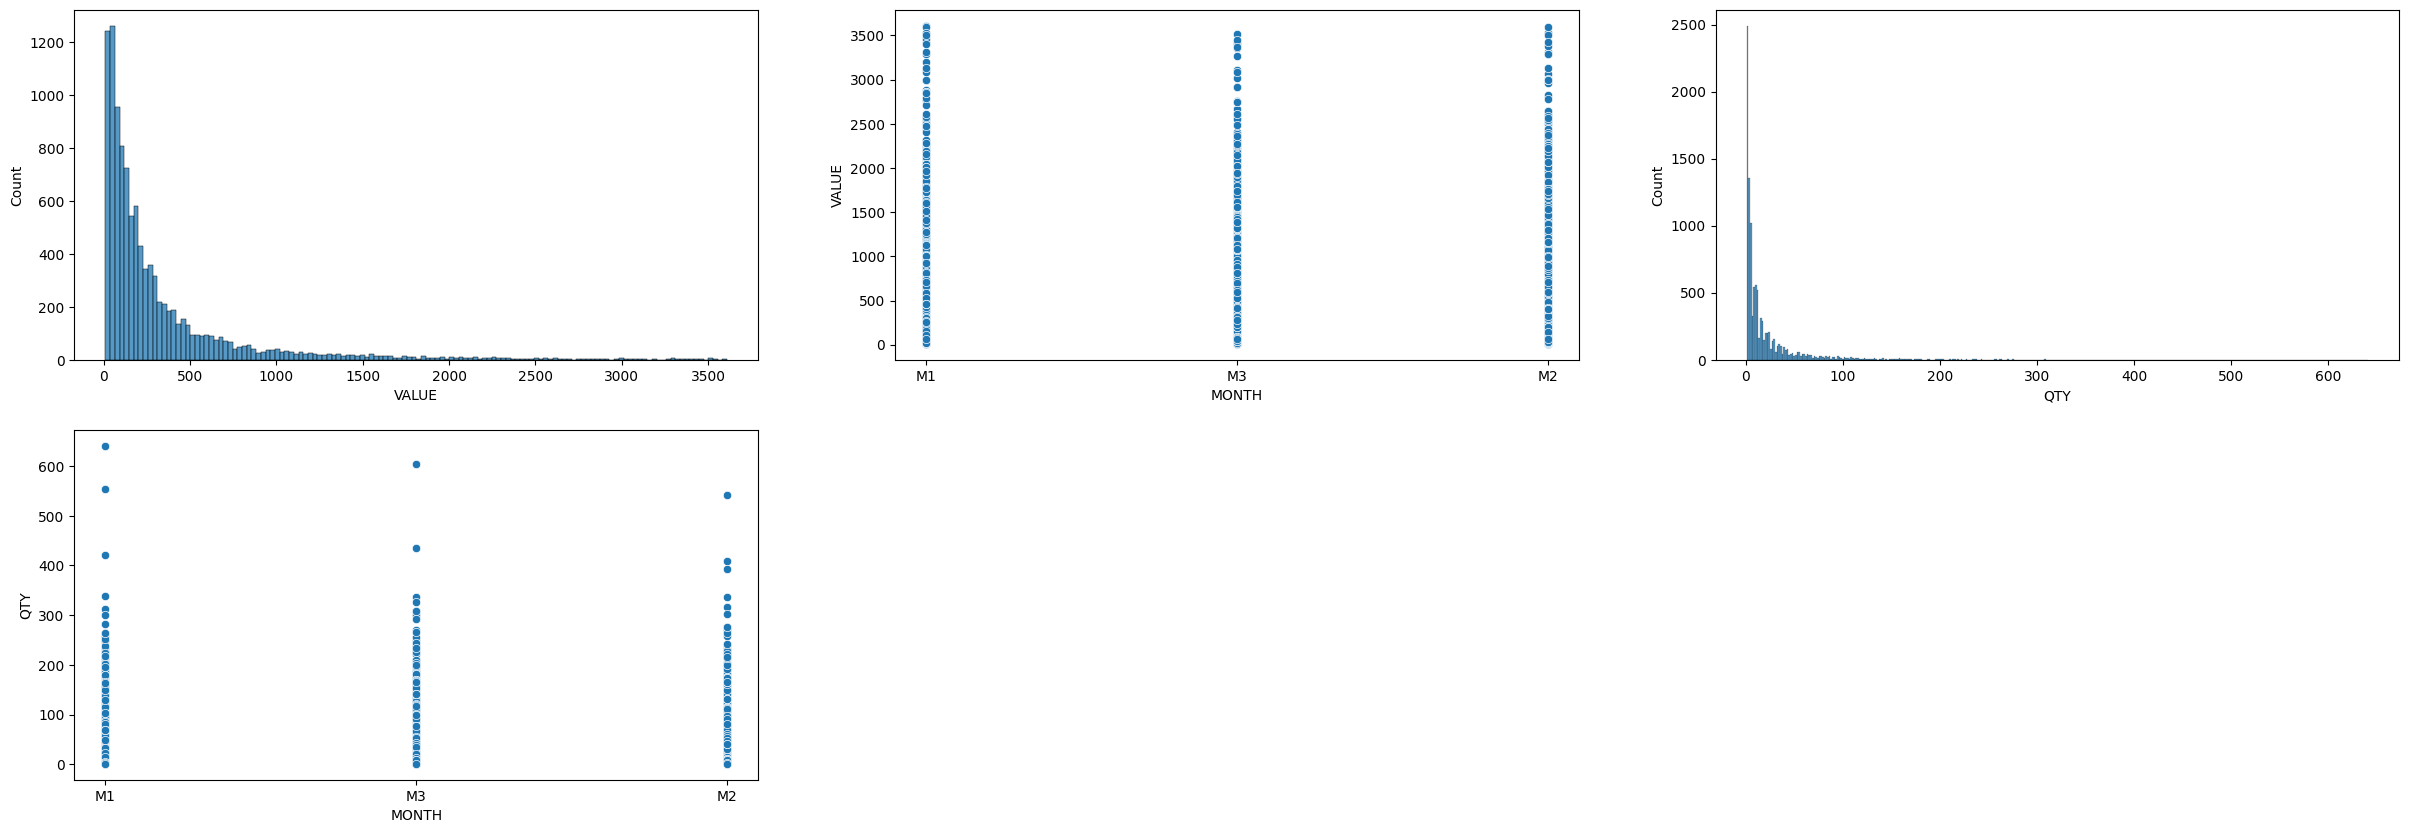

In [ ]:
print(F.shape)
IQR25 = F['VALUE'].quantile(0.25)
IQR75 = F['VALUE'].quantile(0.75)
print(IQR25 , IQR75)

ul = IQR75 + 1.5 * IQR75
ll = IQR25 + 1.5 * IQR25
print ('Upper Limit is:', ul , 'Lower Limit is',ll)
trial = F[F['VALUE'] < ul]
trial = trial[trial['VALUE'] > ll]
print(trial.shape)

upper = F['VALUE'].quantile(0.99)
lower = F['VALUE'].quantile(0.01)
print('Upper Limit is:',upper,'Lower Limit is', lower)
CF = F[(F['VALUE']>lower ) & (F['VALUE']<upper)]
print(CF.shape)

plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
se.histplot(CF['VALUE'])
plt.subplot(2,3,2)
se.scatterplot(CF,x= 'MONTH' , y = 'VALUE')
plt.subplot(2,3,3)
se.histplot(CF['QTY'])
plt.subplot(2,3,4)
se.scatterplot(CF,x= 'MONTH' , y = 'QTY')

print(F.describe())
print(CF.describe())







Upper Limit is: 176.0 Lower Limit is 1.0
(10590, 10)
                QTY         VALUE
count  10922.000000  10922.000000
mean      21.283556    384.411829
std       37.903976    848.424588
min        1.000000      1.000000
25%        3.000000     68.000000
50%        8.000000    165.000000
75%       23.000000    378.000000
max      641.000000  24185.000000
                QTY         VALUE
count  10695.000000  10695.000000
mean      20.945208    325.654231
std       36.698135    456.313105
min        1.000000     10.000000
25%        3.000000     70.000000
50%        8.000000    165.000000
75%       22.000000    372.000000
max      641.000000   3611.000000
                QTY         VALUE
count  10590.000000  10590.000000
mean      18.641360    317.529556
std       27.341228    442.609664
min        1.000000     10.000000
25%        3.000000     70.000000
50%        8.000000    161.000000
75%       22.000000    364.000000
max      176.000000   3611.000000


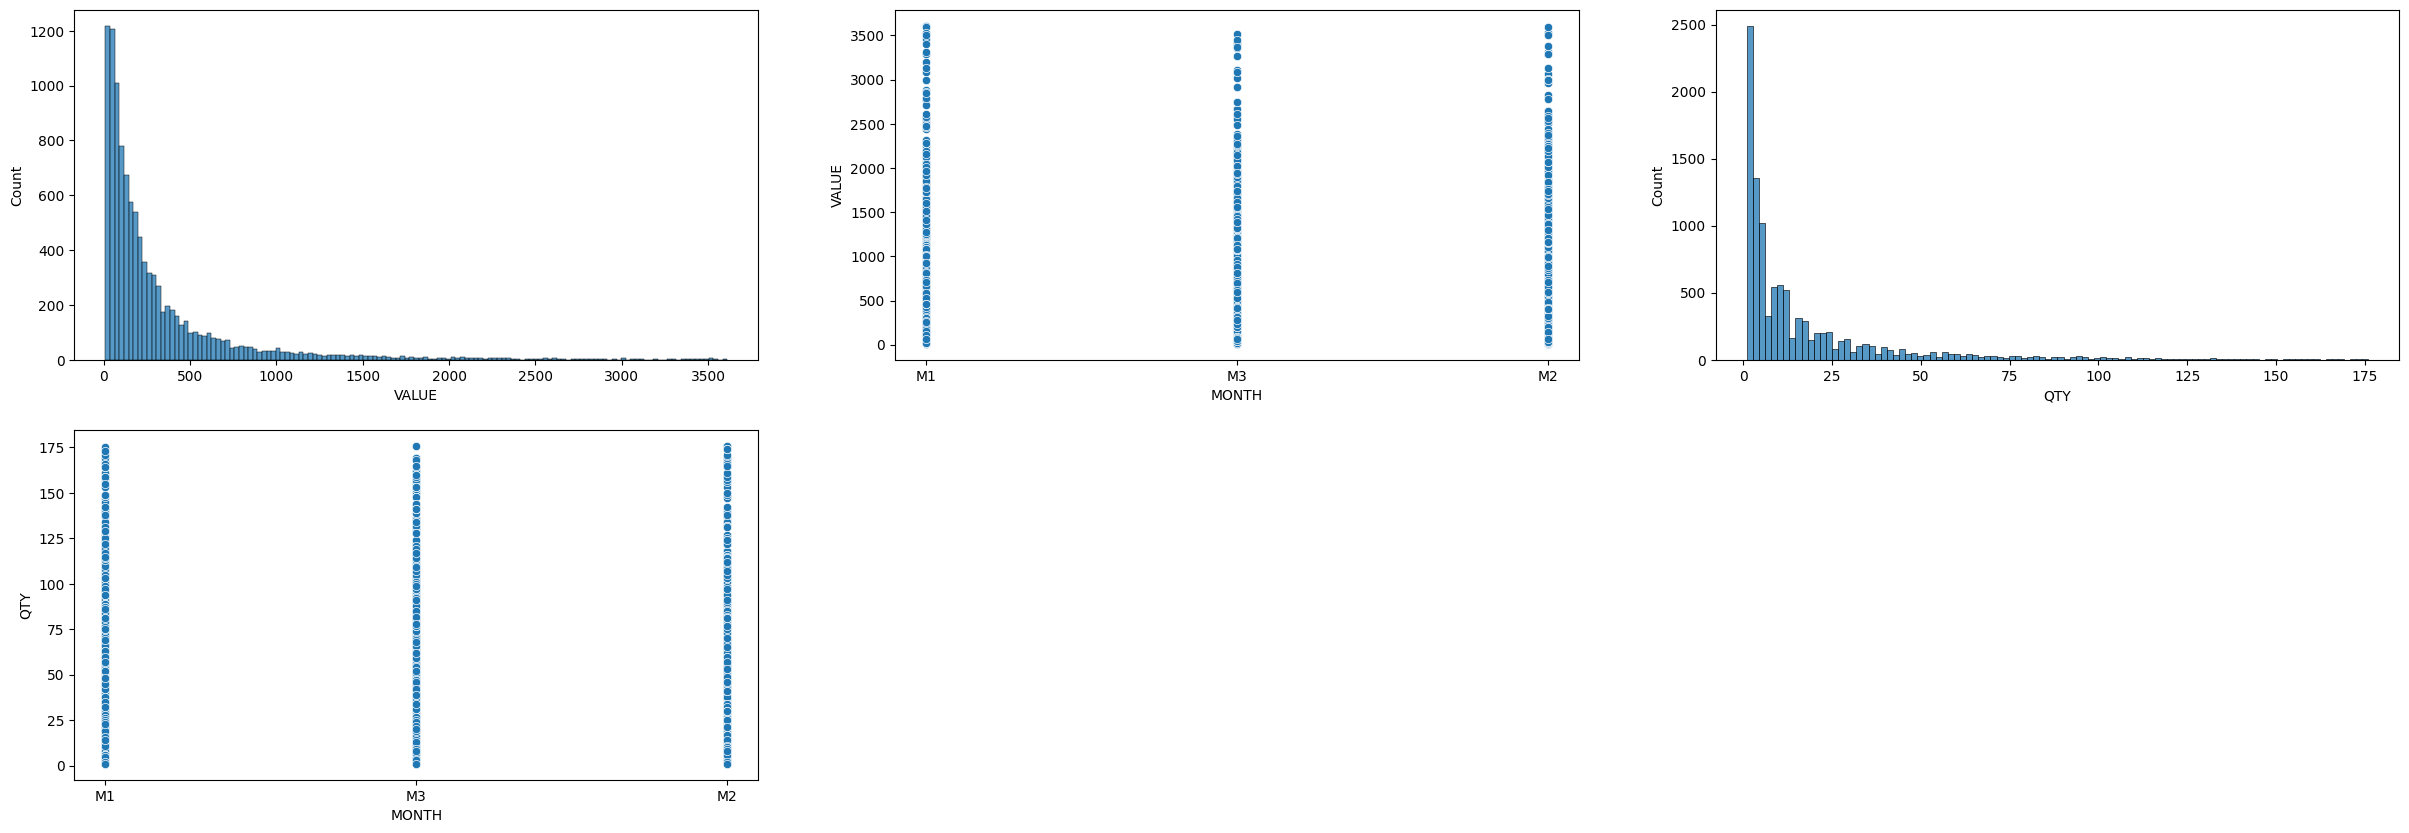

In [ ]:
upper = CF['QTY'].quantile(0.99)
lower = CF['QTY'].quantile(0.01)
print('Upper Limit is:',upper,'Lower Limit is', lower)
CF2 = CF[(CF['QTY']>=lower ) & (CF['QTY']<=upper)]
print(CF2.shape)

plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
se.histplot(CF2['VALUE'])
plt.subplot(2,3,2)
se.scatterplot(CF2,x= 'MONTH' , y = 'VALUE')
plt.subplot(2,3,3)
se.histplot(CF2['QTY'])
plt.subplot(2,3,4)
se.scatterplot(CF2,x= 'MONTH' , y = 'QTY')


print(F.describe())
print(CF.describe())
print(CF2.describe())

After removing the outliers we start visualizing our data.

<ipython-input-88-528cbfe42218>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CF2.groupby(['STORECODE']).sum().plot(kind='pie', y='VALUE',autopct='%1.0f%%', figsize = (9,10))


<Axes: ylabel='VALUE'>

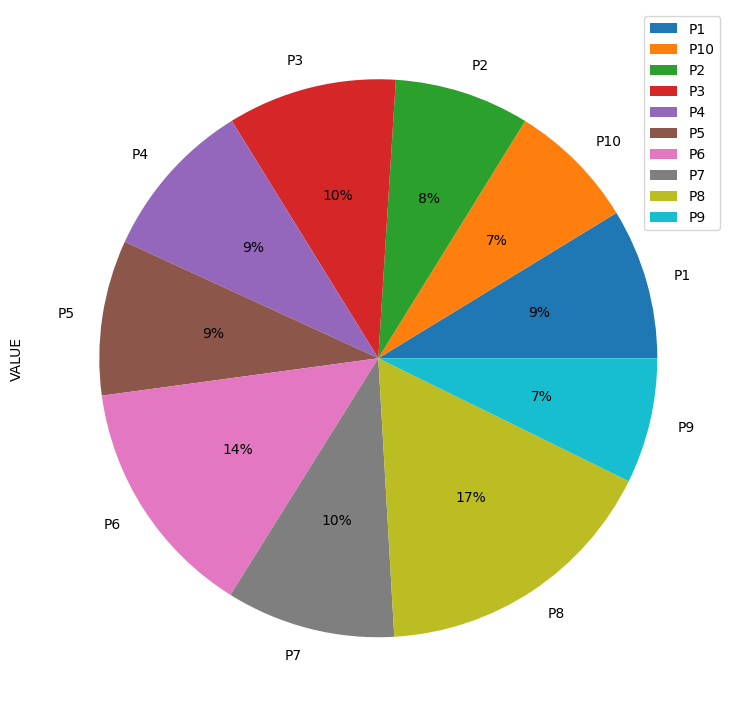

In [ ]:
#Total value by Storecode to identify highest value stores
CF2.groupby(['STORECODE']).sum().plot(kind='pie', y='VALUE',autopct='%1.0f%%', figsize = (9,10))

The above pie chart conveys that store "P8" has the highest revnue and "P1" and "P9" are the lowest.

<ipython-input-89-e09e9c86a991>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CF2.groupby(['MONTH']).sum().plot(kind='bar',y='VALUE',rot =0)
<ipython-input-89-e09e9c86a991>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CF2.groupby(['MONTH']).mean().plot(kind='bar',y='VALUE',rot =0)


<Axes: xlabel='MONTH'>

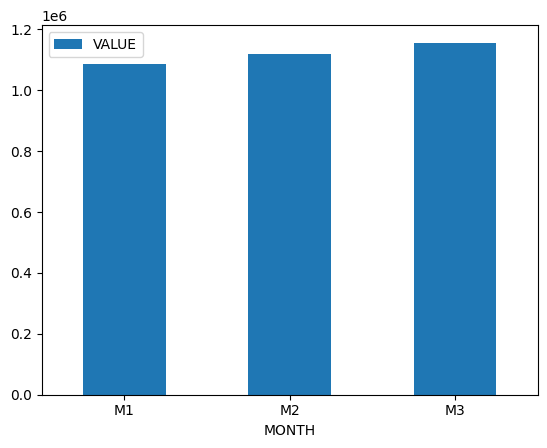

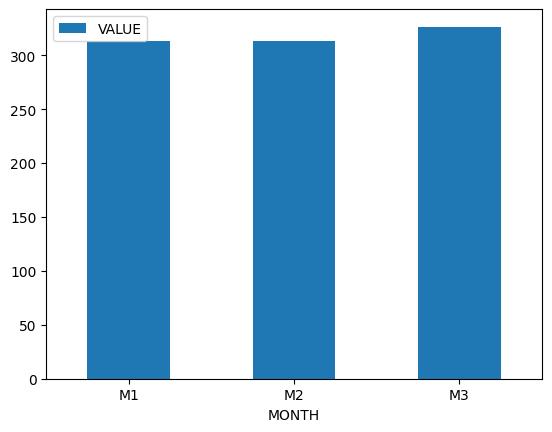

In [ ]:
CF2.groupby(['MONTH']).sum().plot(kind='bar',y='VALUE',rot =0)

CF2.groupby(['MONTH']).mean().plot(kind='bar',y='VALUE',rot =0)

From the previous histogram it certainly shows that there is no significant relationship between the month and the value returns.

Basically the Value returns and Quantities bought are strongly independent variables.

<function matplotlib.pyplot.show(close=None, block=None)>

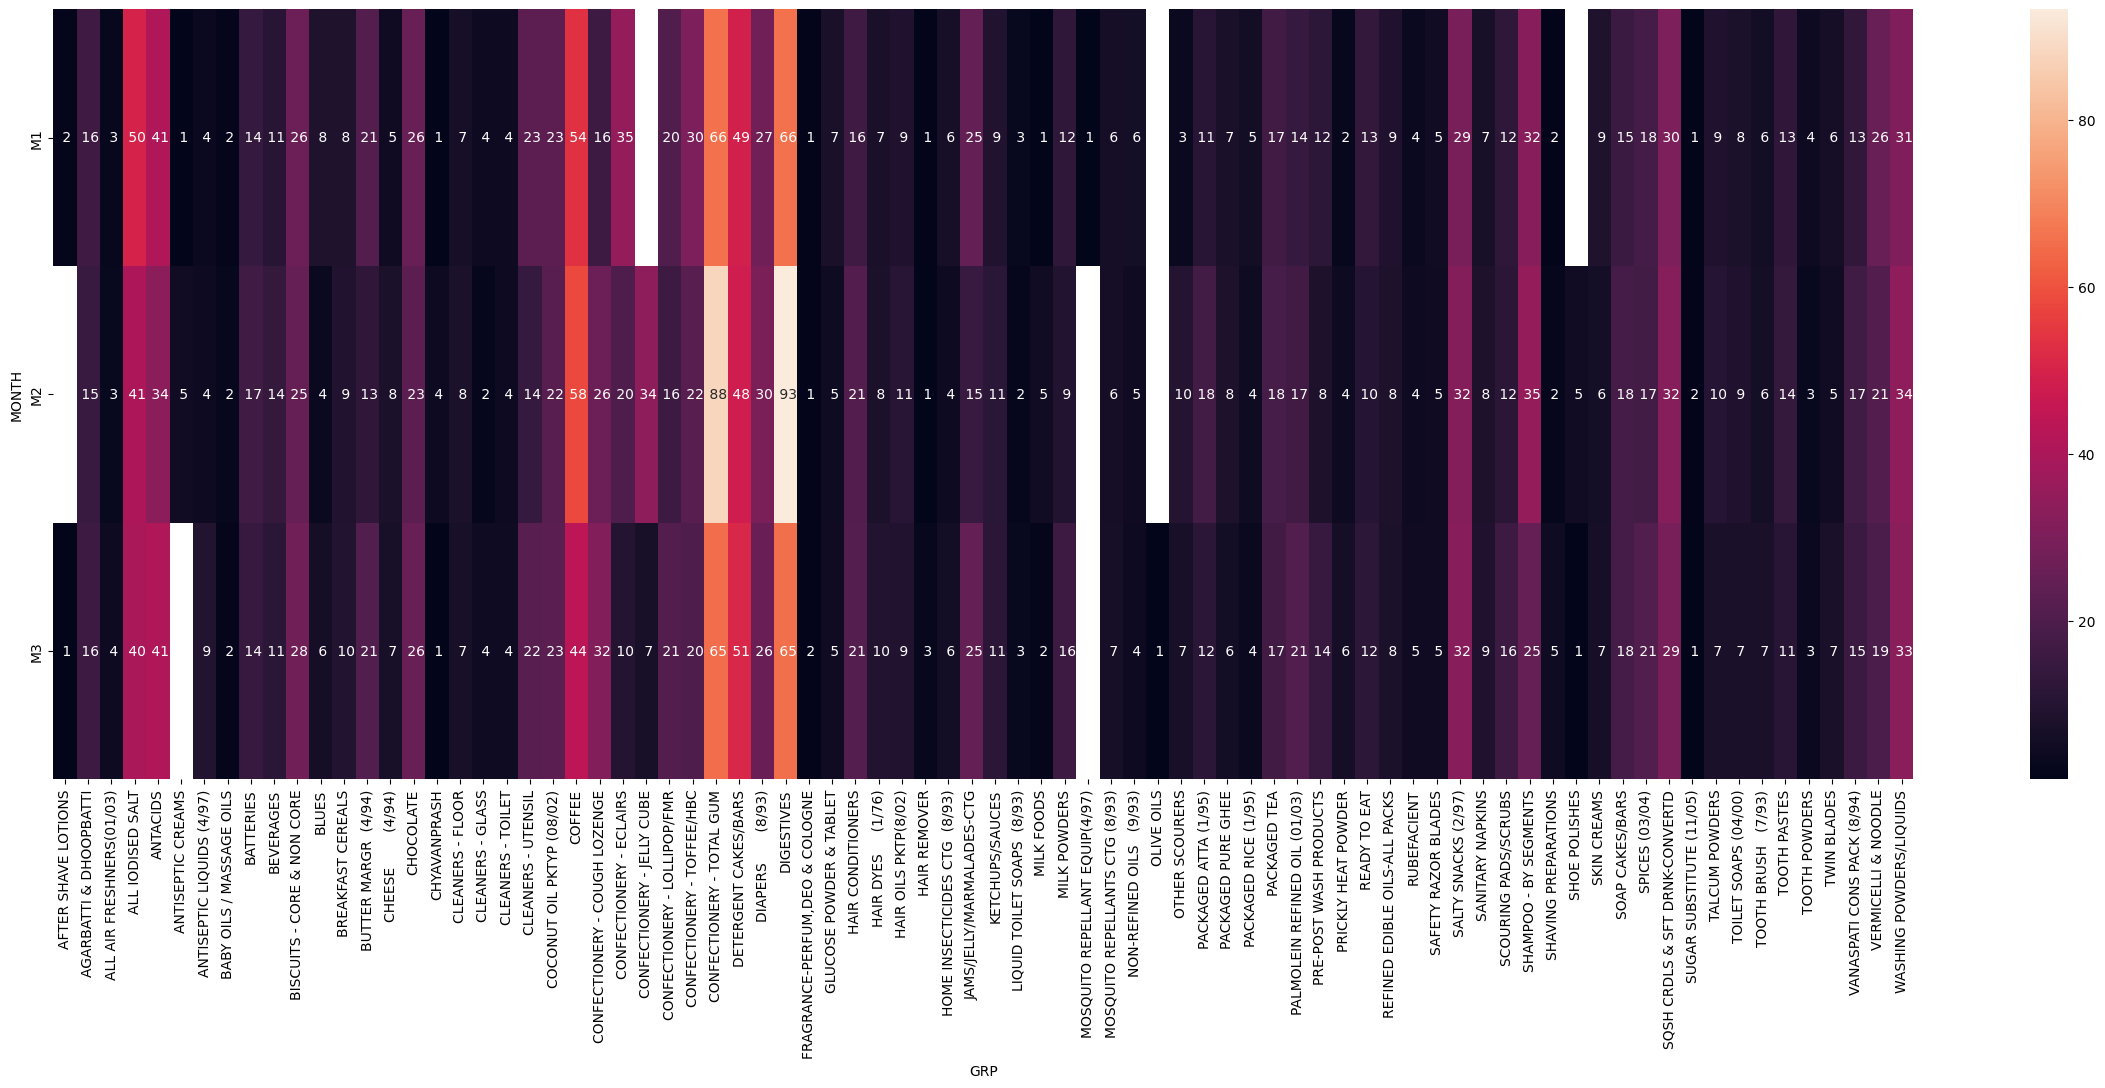

In [ ]:
valuevsqtyvsgrp = CF2.pivot_table(index = 'MONTH', columns = 'GRP', values = 'QTY')
plt.figure(figsize = (30,10))
se.heatmap(valuevsqtyvsgrp,annot = True, fmt = ' .0f')
plt.show

From the heatmap we can conclude that "TOTAL GUM", "DETERGENT CAKES/BARS", "DIGESTIVES", "COFFEE", "ALL IODIZED SALT" and "ANTACIDS" are the highest 6 Groups in terms of Quantities bought accross all three months. However it seems that the second month is quite heavy on **Gum and Digestives**.

    index                            GRP        QTY        VALUE
0      53  PALMOLEIN REFINED OIL (01/03)  16.809524  1437.000000
1      57  REFINED EDIBLE OILS-ALL PACKS   8.156250  1283.523438
2      49           PACKAGED ATTA (1/95)  13.437500  1171.359375
3      13           BUTTER MARGR  (4/94)  17.956522  1153.913043
4      14           CHEESE        (4/94)   6.200000  1149.866667
5      21      COCONUT OIL PKTYP (08/02)  22.709091  1129.872727
6      50             PACKAGED PURE GHEE   7.068182  1007.534091
7      51           PACKAGED RICE (1/95)   4.447368   873.657895
8      79        WASHING POWDERS/LIQUIDS  32.779026   741.067416
9       3               ALL IODISED SALT  43.105263   692.618421
10     52                   PACKAGED TEA  17.344322   670.150183
11     30           DIAPERS       (8/93)  27.600000   641.914286
12     77     VANASPATI CONS PACK (8/94)  14.851064   631.893617
13     46      NON-REFINED OILS   (9/93)   4.907216   628.381443
14      9                

<Axes: xlabel='GRP'>

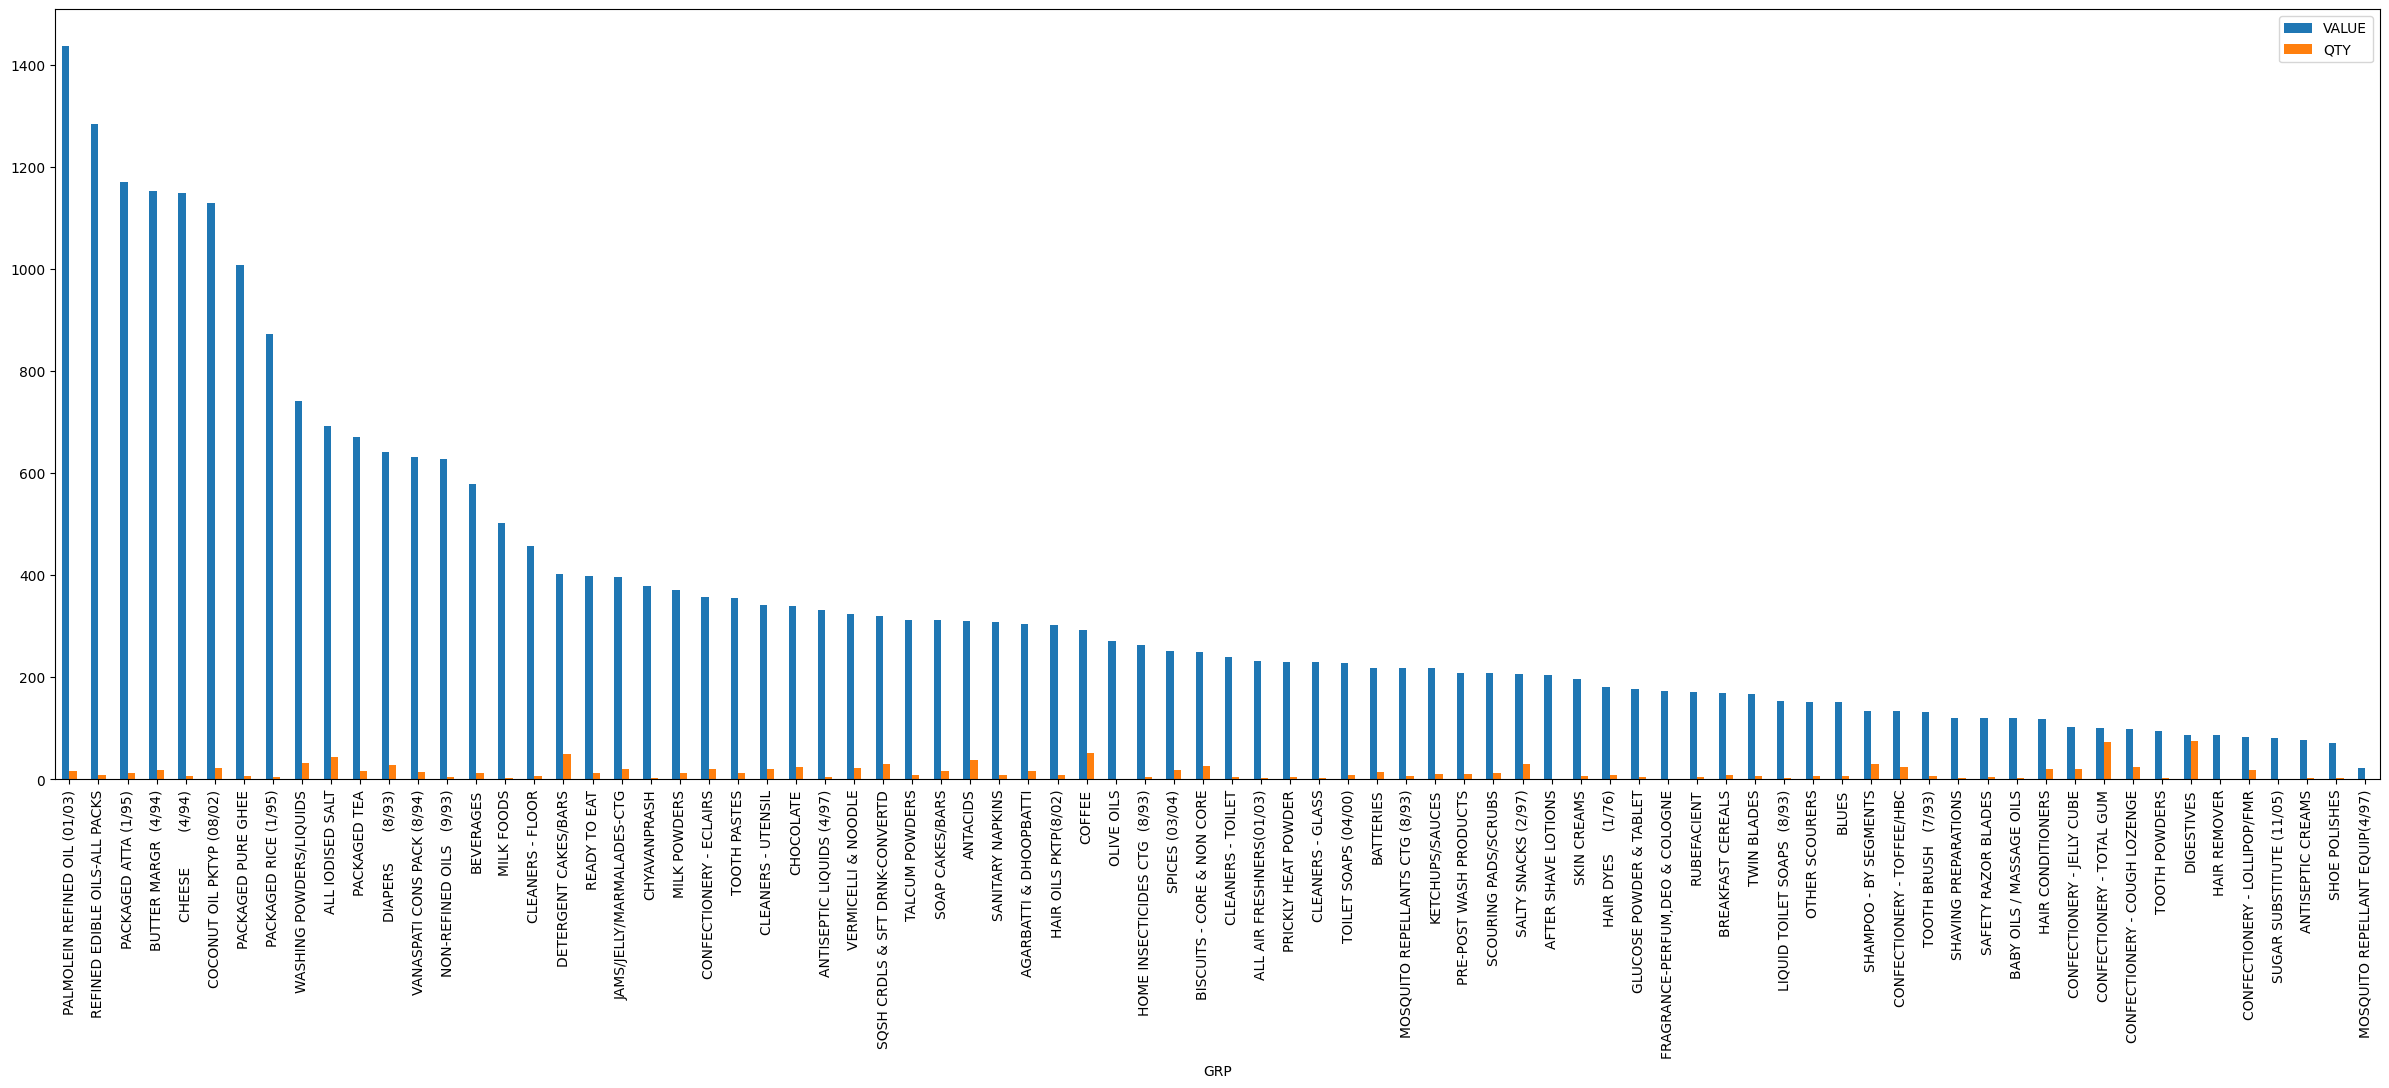

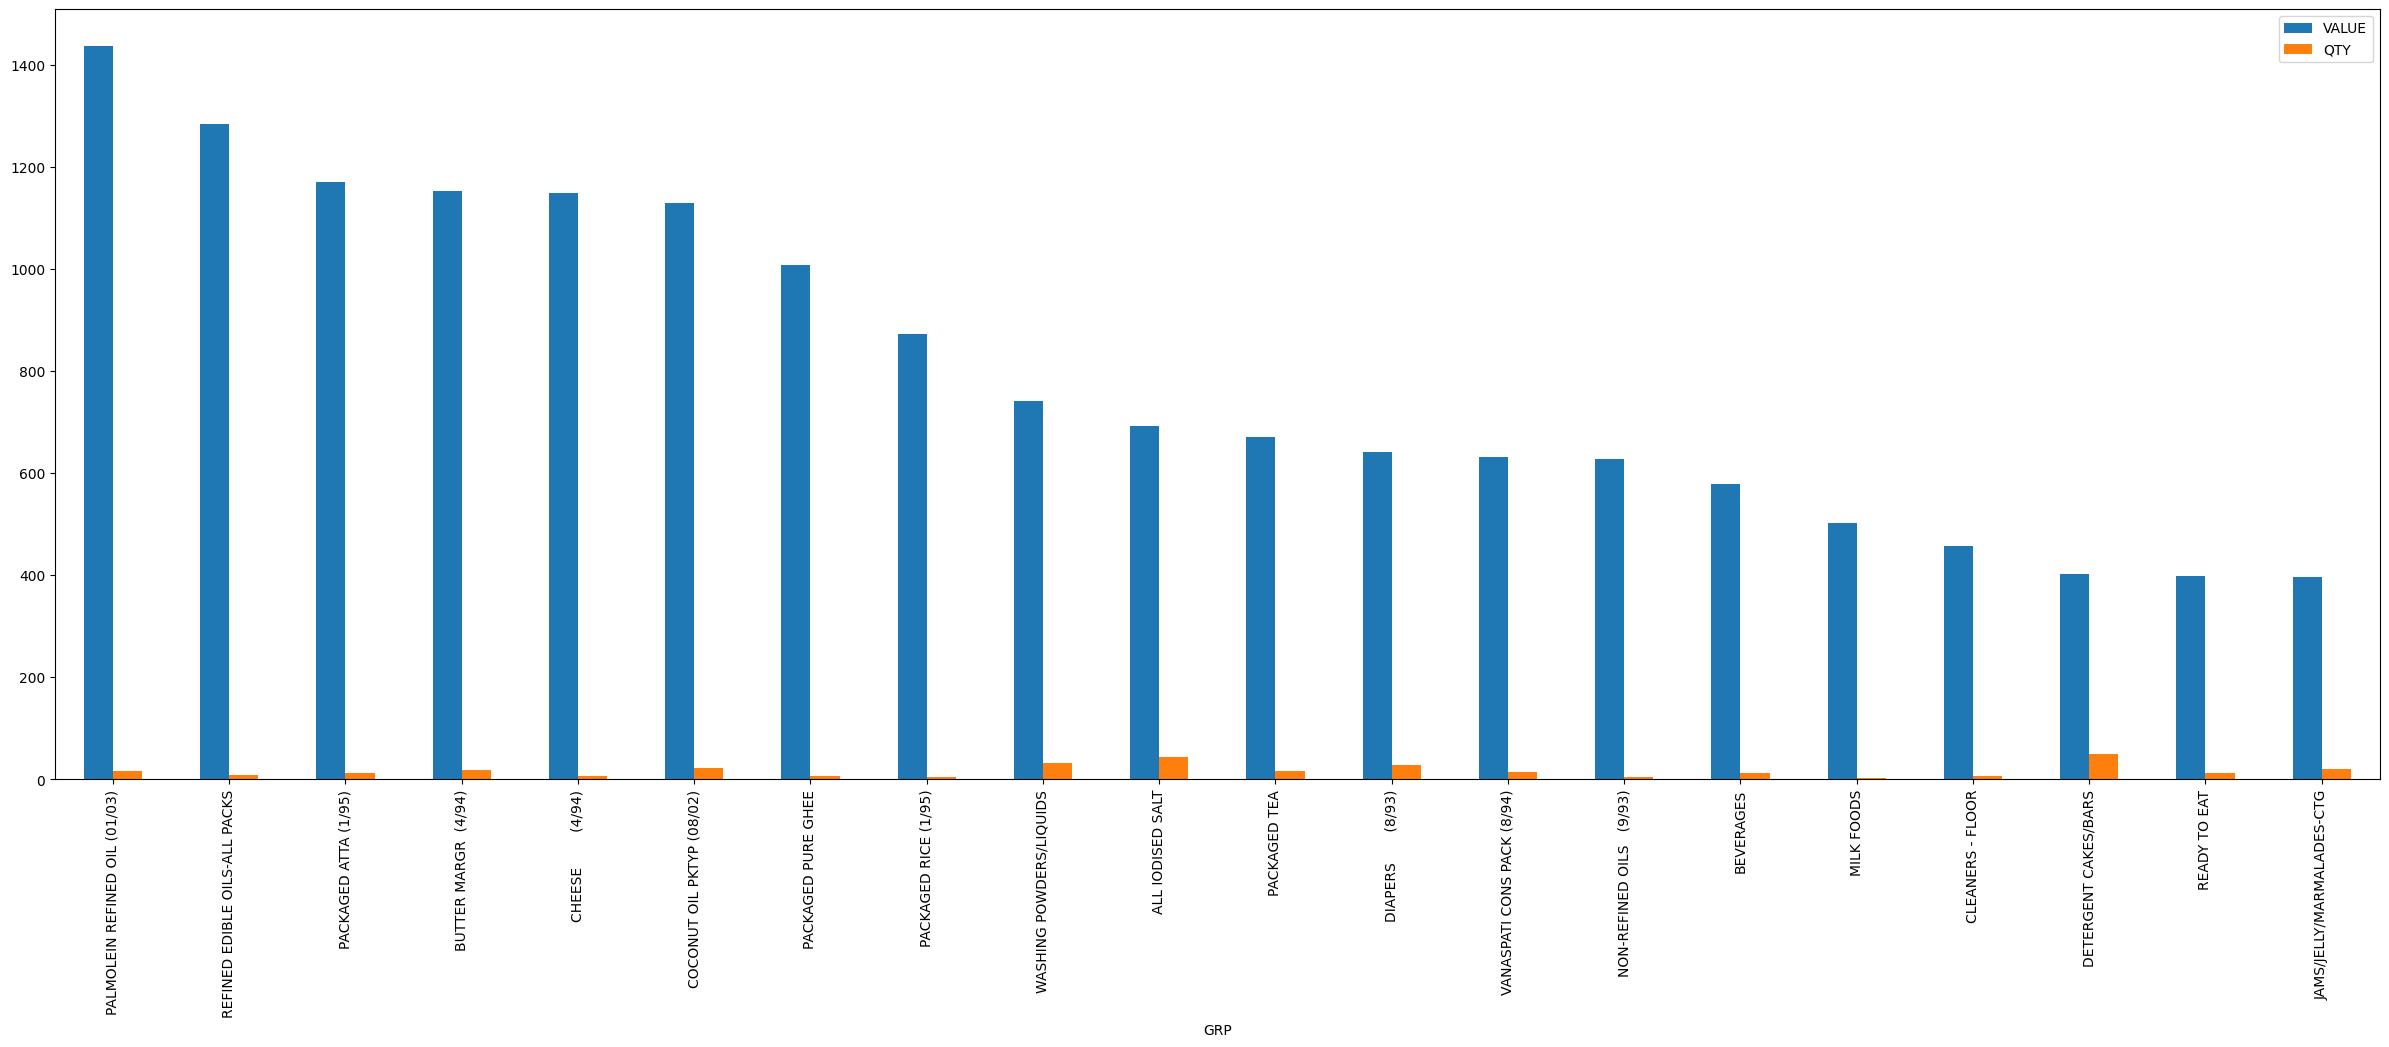

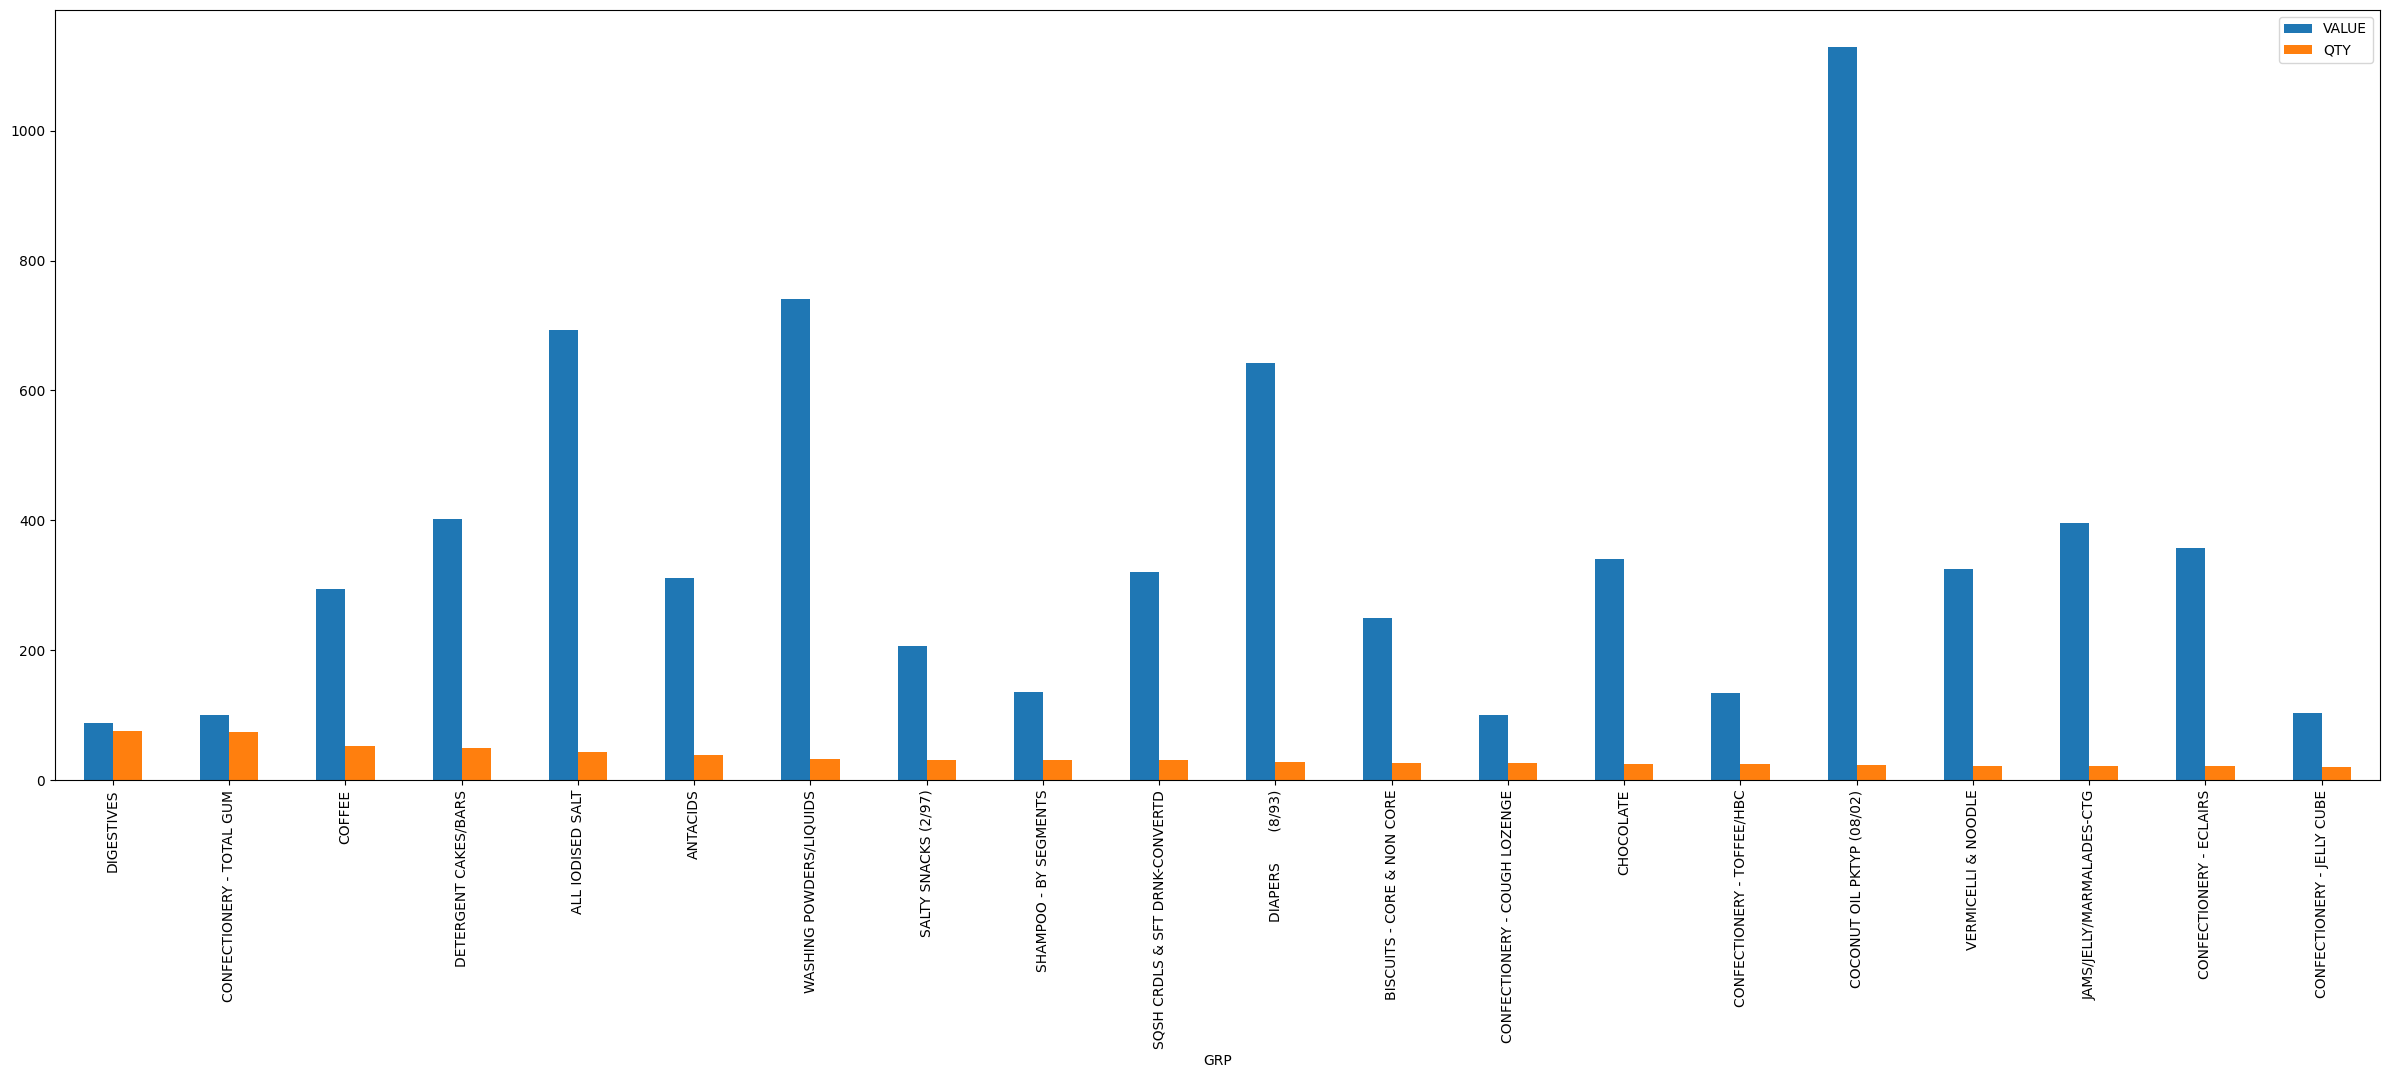

In [94]:
grp_mean = CF2.groupby('GRP').mean(numeric_only = True)

grp_mean = grp_mean.reset_index()


grp_meanV = grp_mean.nlargest(n=20, columns = ['VALUE'])
grp_mean_V = grp_meanV.reset_index()
grp_meanQ = grp_mean.nlargest(n=20, columns = ['QTY'])
grp_mean_Q = grp_meanQ.reset_index()

print(grp_mean_V.sort_values(by=['VALUE'], ascending = False),'\n', grp_mean_Q.sort_values(by = ['QTY'], ascending = False))

grp_mean.sort_values(by = 'VALUE', ascending = False).plot(x="GRP", y=["VALUE", "QTY"], kind="bar", figsize=(30, 10))

grp_mean_V.sort_values(by = 'VALUE', ascending = False).plot(x="GRP", y=["VALUE", "QTY"], kind="bar", figsize=(30, 10))

grp_mean_Q.sort_values(by = 'QTY', ascending = False).plot(x="GRP", y=["VALUE", "QTY"], kind="bar", figsize=(30, 10))


    index                             GRP        QTY       VALUE
19     48                  OTHER SCOURERS   7.083333  152.333333
18     11                           BLUES   6.000000  151.086957
17     63           SHAMPOO - BY SEGMENTS  30.766197  134.678873
16     27      CONFECTIONERY - TOFFEE/HBC  24.603604  134.108108
15     73            TOOTH BRUSH   (7/93)   6.243750  132.906250
14     64            SHAVING PREPARATIONS   2.821429  120.714286
13     59             SAFETY RAZOR BLADES   4.933333  120.177778
12      7        BABY OILS / MASSAGE OILS   2.000000  120.000000
11     34               HAIR CONDITIONERS  19.678899  119.357798
10     25      CONFECTIONERY - JELLY CUBE  20.500000  103.500000
9      28       CONFECTIONERY - TOTAL GUM  73.422222  100.288889
8      23   CONFECTIONERY - COUGH LOZENGE  25.232558   99.534884
7      75                   TOOTH POWDERS   3.500000   95.903846
6      31                      DIGESTIVES  74.833333   87.708333
5      37                

<Axes: xlabel='GRP'>

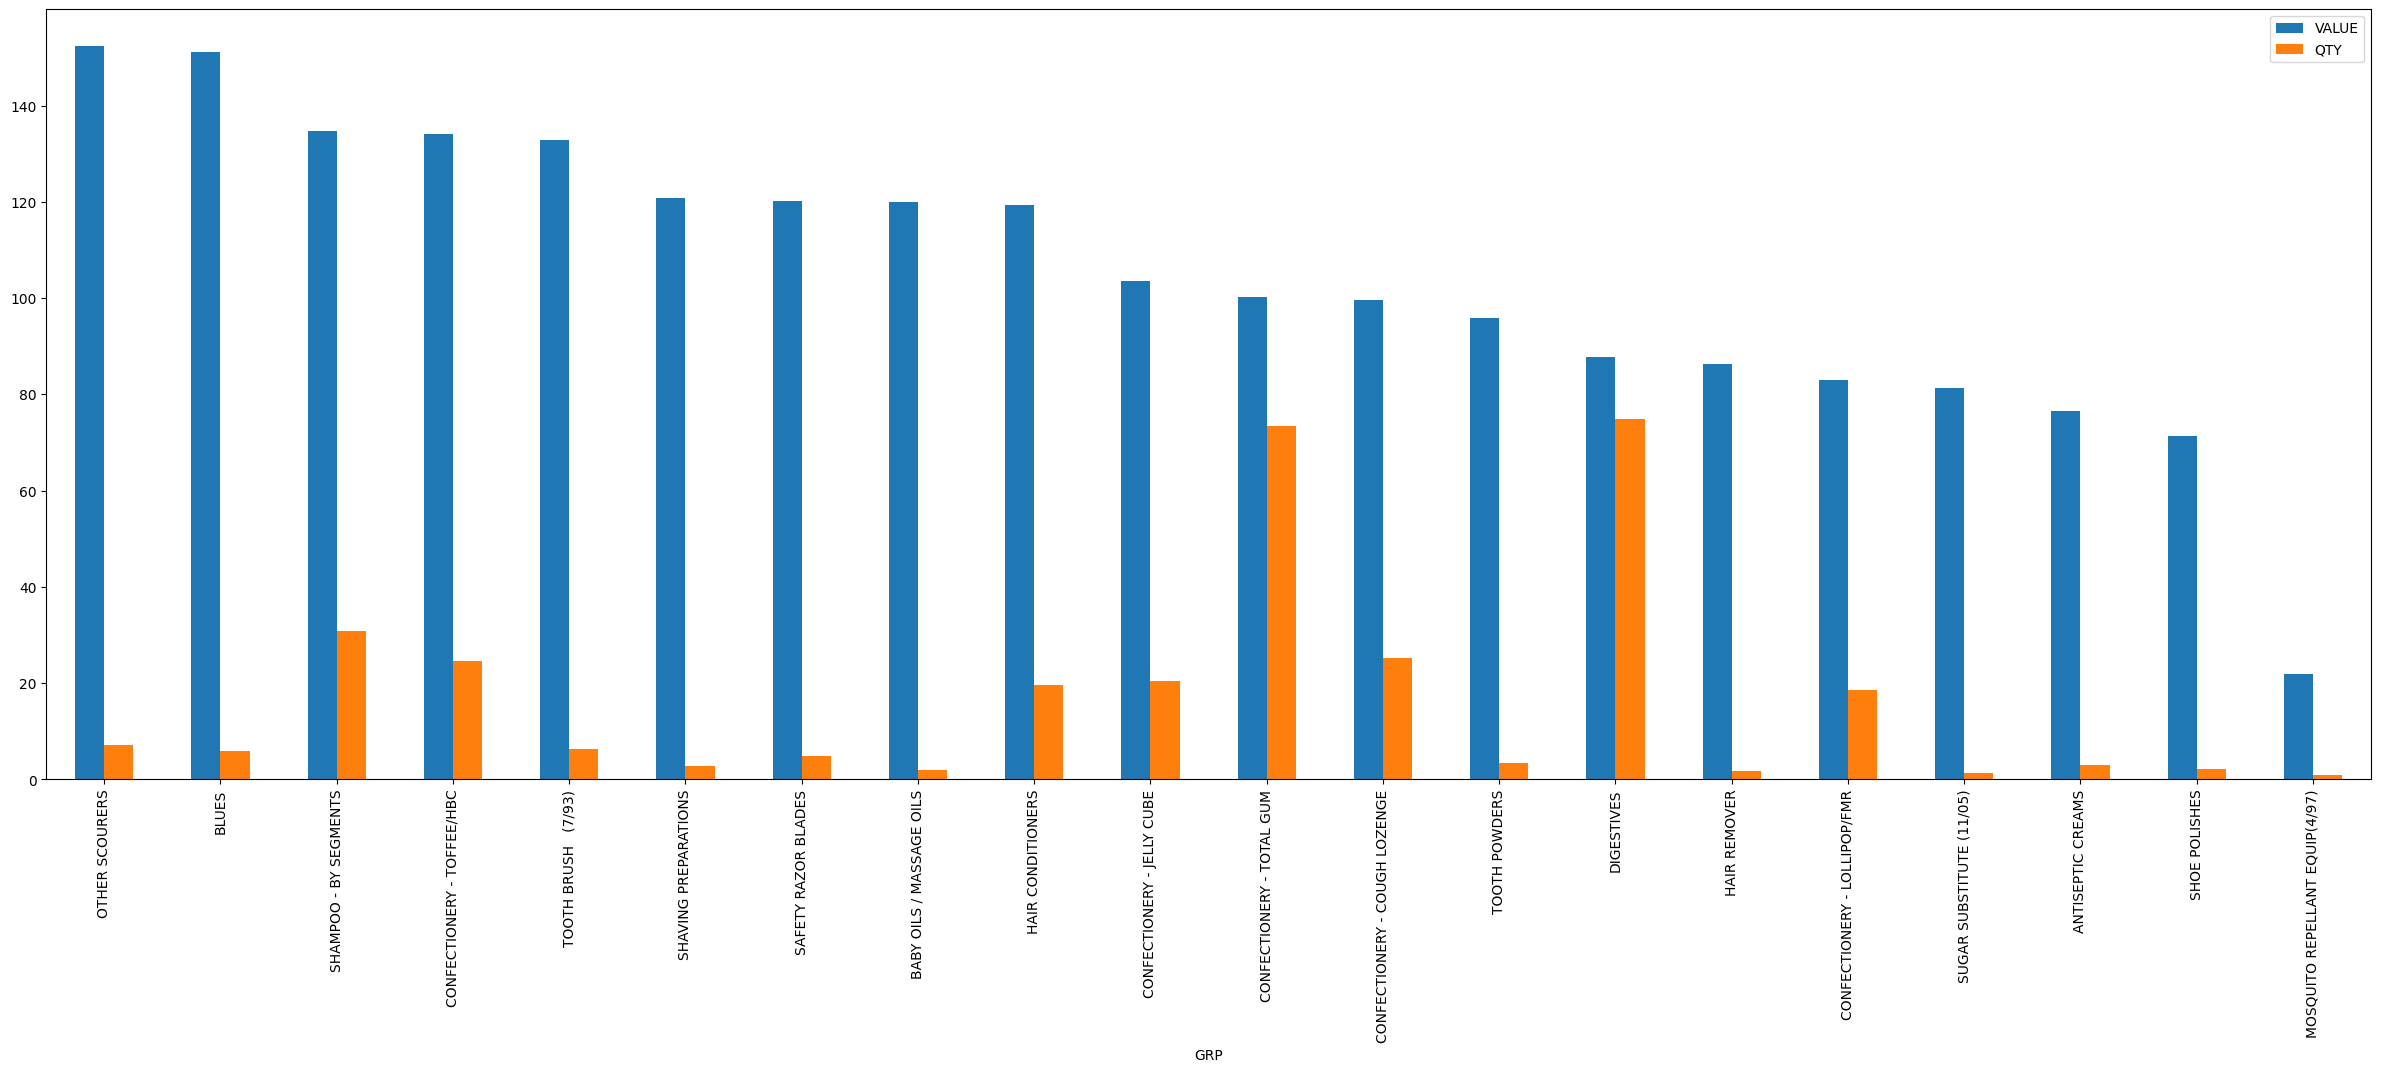

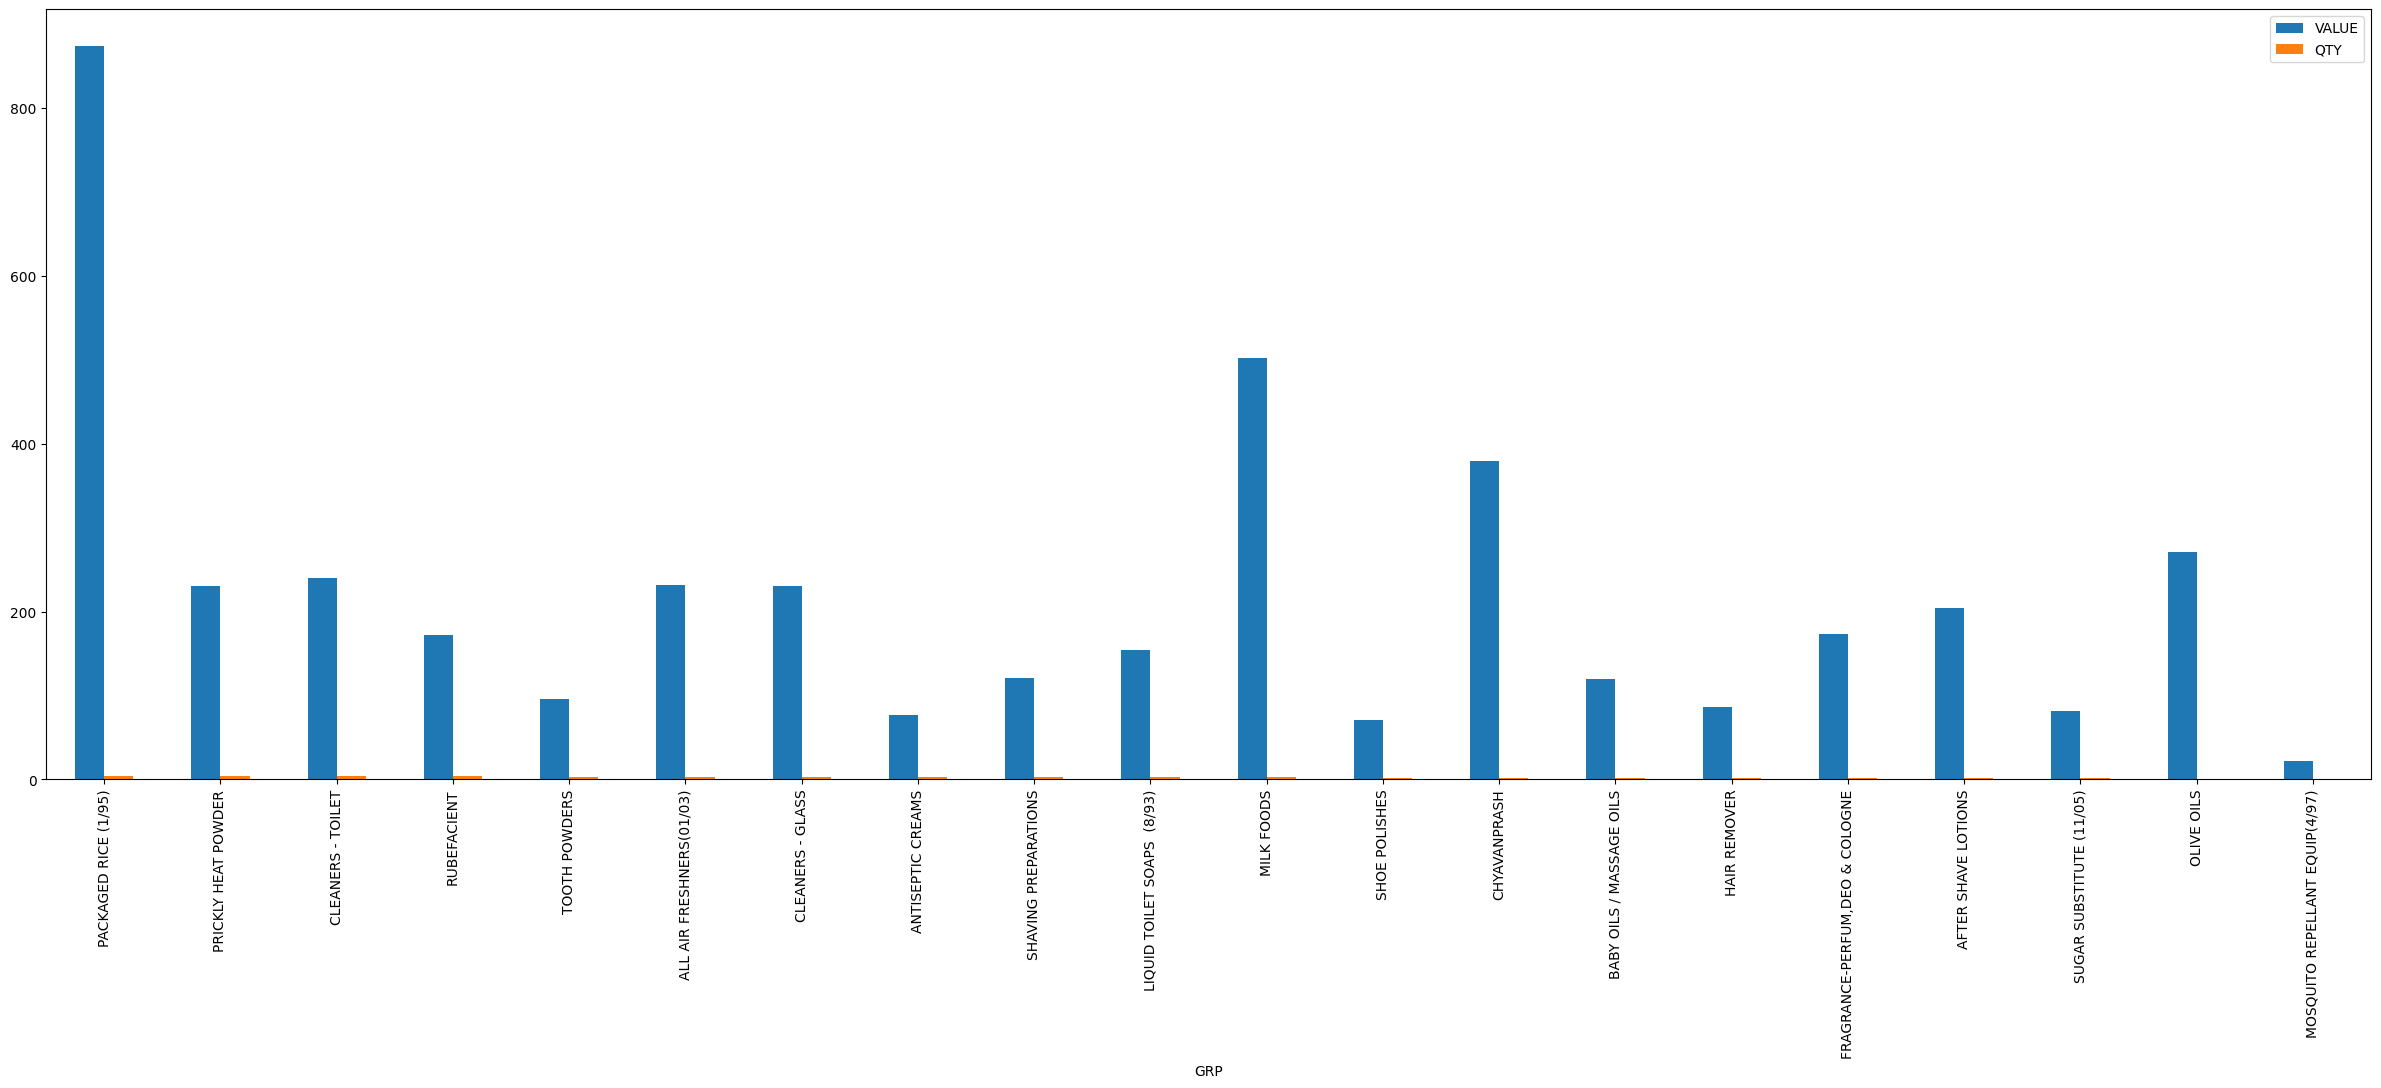

In [96]:
grp_mean = CF2.groupby('GRP').mean(numeric_only = True)

grp_mean = grp_mean.reset_index()


grp_meanV = grp_mean.nsmallest(n=20, columns = ['VALUE'])
grp_mean_V = grp_meanV.reset_index()
grp_meanQ = grp_mean.nsmallest(n=20, columns = ['QTY'])
grp_mean_Q = grp_meanQ.reset_index()

print(grp_mean_V.sort_values(by=['VALUE'], ascending = False),' \n', grp_mean_Q.sort_values(by = ['QTY'], ascending = False))


grp_mean_V.sort_values(by = 'VALUE', ascending = False).plot(x="GRP", y=["VALUE", "QTY"], kind="bar", figsize=(30, 10))

grp_mean_Q.sort_values(by = 'QTY', ascending = False).plot(x="GRP", y=["VALUE", "QTY"], kind="bar", figsize=(30, 10))

At the end, the data presented here reiterates the amazing and diverse customer behaviour accross the 3 months and 9 stores.

Further data is needed to connect the dots, where are the stores located? which season these 3 months are in? are they consecutive months? and so on...